<a href="https://colab.research.google.com/github/robertopsouto/invmultifis_notebooks/blob/main/AED_%2B_spilines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CÓDIGO 1.0 - MODELO JUBARTE LINE20
# Objetivo: Visualização do dataset.
# Os valores de algumas colunas parecem estar multiplicadas por 1000, como é o caso de RxGridE.
# Escolhi apenas um dos novos datasets gerados por Rocio usando Linux.

import pandas as pd
arquivo = '/content/Jubarte_JUB20_2002H_23.3V_31.csv'
df = pd.read_csv(arquivo)
df.head()

,Stn,RxGridE,RxGridN,RxElev,Altitude Receiver,Freq,SourceGridE,SourceGridN,SourceElev,Altitude Source [positive from Seabottom],...,SourceParameters,Offset,AmpObs,PhaseObs,AmpErr,PhaseErr,AmpMod,PhaseMod,StnID,LineID
0,10928.32,389395406.0,7646569.0,-1247.97,0.0,0.75,383013188,7638963500,-989440,30000,...,321,-9928320,6.470300e-17,6953.8,1.0,1.0,6.468890e-17,6953.4,RX10,JUB_RX20
1,10928.32,389395406.0,7646569.0,-1247.97,0.0,0.75,383077500,7639040500,-989440,30000,...,321,-9828320,6.545200e-17,6957.0,1.0,1.0,6.543710e-17,6956.6,RX10,JUB_RX20
2,10928.32,389395406.0,7646569.0,-1247.97,0.0,0.75,383142094,7639117000,-989463,30000,...,321,-9728320,7.064100e-17,6960.1,1.0,1.0,7.062500e-17,6959.7,RX10,JUB_RX20
3,10928.32,389395406.0,7646569.0,-1247.97,0.0,0.75,383206438,7639193500,-995767,30000,...,321,-9628320,7.038700e-17,6978.7,1.0,1.0,7.036910e-17,6978.3,RX10,JUB_RX20
4,10928.32,389395406.0,7646569.0,-1247.97,0.0,0.75,383270312,7639270500,-1002026,30000,...,321,-9528320,6.981900e-17,6995.4,1.0,1.0,6.979950e-17,6995.0,RX10,JUB_RX20


In [ ]:
# CÓDIGO 3.0 - DESCRIÇÃO ESTATÍSTICA -  MODELO JUBARTE LINE20
# Objetivo: Descrição estatística das colunas AmpMod e PhaseMod do dataset.

import pandas as pd

arquivo = '/content/Jubarte_JUB20_2002H_23.3V_31.csv'
df = pd.read_csv(arquivo)

columns_to_describe = ['AmpMod','AmpObs' , 'PhaseMod', 'PhaseObs']
selected_df = df[columns_to_describe]

description = selected_df.describe()

print(description)

             AmpMod        AmpObs      PhaseMod     PhaseObs
count  2.520000e+03  2.520000e+03   2520.000000  2520.000000
mean   7.278874e-13  7.287470e-13   6458.123532  6381.954008
std    2.658256e-12  2.658584e-12   2340.083787  2293.842403
min    9.791610e-18  9.785700e-18   1407.100000  1407.200000
25%    7.618480e-17  8.823900e-17   4807.575000  4815.025000
50%    1.287265e-15  1.590200e-15   7275.750000  7213.200000
75%    6.167905e-14  6.592025e-14   8334.650000  8095.100000
max    2.153850e-11  2.153900e-11  10041.900000  9940.700000


In [ ]:
# CÓDIGO 2.0
# Objetivo: Criar Arquivos Separados para Cada Estação e Frequência: Para cada combinação de StnID e Freq,
# o código filtra os dados e gera um arquivo CSV exclusivo.
# Cada arquivo representa um conjunto de dados de um StnID em uma frequência específica, no caso do
# modelo Jubarte LIne 20 uma única frequência (0.75), o que pode  facilitar análises detalhadas para cada caso.
# Salvar e Imprimir Resultados: O código salva cada dataset filtrado em um novo arquivo CSV em um diretório específico
#  e imprime o conteúdo de cada dataset no console.

import pandas as pd
import os

# Carregar os dados do CSV
dados = pd.read_csv('/content/Jubarte_JUB20_2002H_23.3V_31.csv', header=0)

# Selecionar as colunas relevantes
colunas_selecionadas = dados[['AmpMod', 'PhaseMod', 'Offset', 'StnID', 'Freq']]

# Obter os valores únicos de StnID
stn_ids = colunas_selecionadas['StnID'].unique()

# Diretório para salvar os datasets separados
output_dir = '/content/dataset_separado1_Jubarte_JUB20_2002H_23.3V_31'
os.makedirs(output_dir, exist_ok=True)

# Gerar e salvar datasets para cada StnID
for stn_id in stn_ids:
    # Filtrar os dados para o StnID atual
    dados_stn = colunas_selecionadas[colunas_selecionadas['StnID'] == stn_id]

    # Obter as frequências únicas para o StnID atual
    freqs = dados_stn['Freq'].unique()

    for freq in freqs:
        # Filtrar os dados para a frequência atual
        dados_freq = dados_stn[dados_stn['Freq'] == freq]

        # Gerar o nome do arquivo para o StnID e frequência atuais
        nome_arquivo = os.path.join(output_dir, f'dataset_{stn_id}_freq_{freq}.csv')

        # Salvar o dataset filtrado em um arquivo CSV
        dados_freq.to_csv(nome_arquivo, index=False)

        # Printar o dataset atual
        print(f'Dataset para StnID = {stn_id}, Freq = {freq}')
        print(dados_freq)
        print("\n")

print(f'Datasets separados foram salvos no diretório: {output_dir}')


Dataset para StnID = RX10, Freq = 0.75
           AmpMod  PhaseMod   Offset StnID  Freq
0    6.468890e-17    6953.4 -9928320  RX10  0.75
1    6.543710e-17    6956.6 -9828320  RX10  0.75
2    7.062500e-17    6959.7 -9728320  RX10  0.75
3    7.036910e-17    6978.3 -9628320  RX10  0.75
4    6.979950e-17    6995.0 -9528320  RX10  0.75
..            ...       ...      ...   ...   ...
175  1.562720e-17    8495.2  9571680  RX10  0.75
176  1.459380e-17    8403.2  9671680  RX10  0.75
177  1.392440e-17    8378.4  9771680  RX10  0.75
178  1.356230e-17    8328.7  9871680  RX10  0.75
179  1.342360e-17    8266.2  9971680  RX10  0.75

[180 rows x 5 columns]


Dataset para StnID = RX27, Freq = 0.75
           AmpMod  PhaseMod   Offset StnID  Freq
180  6.227190e-17    7000.7 -9928310  RX27  0.75
181  6.148430e-17    7018.3 -9828310  RX27  0.75
182  6.527290e-17    7029.6 -9728310  RX27  0.75
183  6.569440e-17    7033.0 -9628310  RX27  0.75
184  6.654420e-17    7035.3 -9528310  RX27  0.75
..            

In [ ]:
# CÓDIGO 2.1 COM CÁLCULO DAS ESTATÍSTICAS
# Objetivo: Organizar e processar dados de uma simulação, dividindo-os em arquivos separados por (StnID) e frequência (Freq),
#  e calcular estatísticas descritivas para as colunas numéricas de cada combinação.
# Essas estatísticas incluem informações como média, desvio padrão, valores mínimos e máximos, entre outras.

import pandas as pd
import os

# Carregar os dados do CSV
dados = pd.read_csv('/content/Jubarte_JUB20_2002H_23.3V_31.csv', header=0)

# Selecionar as colunas relevantes
colunas_selecionadas = dados[['AmpMod', 'PhaseMod', 'Offset', 'StnID', 'Freq', 'PhaseObs', 'AmpObs']]

# Obter os valores únicos de StnID
stn_ids = colunas_selecionadas['StnID'].unique()

# Diretório para salvar os datasets separados
output_dir = '/content/dataset_separado2_Jubarte_JUB20_2002H_23.3V_31'
os.makedirs(output_dir, exist_ok=True)

# Gerar e salvar datasets para cada StnID
for stn_id in stn_ids:
    # Filtrar os dados para o StnID atual
    dados_stn = colunas_selecionadas[colunas_selecionadas['StnID'] == stn_id]

    # Obter as frequências únicas para o StnID atual
    freqs = dados_stn['Freq'].unique()

    for freq in freqs:
        # Filtrar os dados para a frequência atual
        dados_freq = dados_stn[dados_stn['Freq'] == freq]

        # Gerar o nome do arquivo para o StnID e frequência atuais
        nome_arquivo = os.path.join(output_dir, f'dataset_{stn_id}_freq_{freq}.csv')

        # Salvar o dataset filtrado em um arquivo CSV
        dados_freq.to_csv(nome_arquivo, index=False)

        # Calcular as estatísticas para as colunas numéricas (AmpMod, PhaseMod, Offset)
        estatisticas = dados_freq[['AmpMod','AmpObs', 'PhaseMod', 'PhaseObs']].describe()

        # Exibir as estatísticas no console
        print(f'Estatísticas para StnID = {stn_id}, Freq = {freq}:')
        print(estatisticas)
        print("\n")

print(f'Datasets separados foram salvos no diretório: {output_dir}')


Estatísticas para StnID = RX10, Freq = 0.75:
             AmpMod        AmpObs     PhaseMod     PhaseObs
count  1.800000e+02  1.800000e+02   180.000000   180.000000
mean   7.218552e-13  7.222236e-13  6300.707778  6204.565000
std    2.651227e-12  2.651226e-12  2239.636604  2167.435968
min    1.342360e-17  2.082200e-17  1440.100000  1440.100000
25%    1.142725e-16  1.232100e-16  4741.550000  4747.175000
50%    1.203170e-15  1.515950e-15  7080.450000  7069.000000
75%    5.931430e-14  6.075000e-14  8063.375000  7715.275000
max    2.059640e-11  2.059600e-11  8920.800000  8908.500000


Estatísticas para StnID = RX27, Freq = 0.75:
             AmpMod        AmpObs     PhaseMod     PhaseObs
count  1.800000e+02  1.800000e+02   180.000000   180.000000
mean   7.412423e-13  7.417031e-13  6312.516111  6210.681667
std    2.732494e-12  2.732526e-12  2239.489429  2166.496398
min    1.299030e-17  1.839900e-17  1442.400000  1442.500000
25%    1.105778e-16  1.188525e-16  4774.175000  4780.400000
50%    1

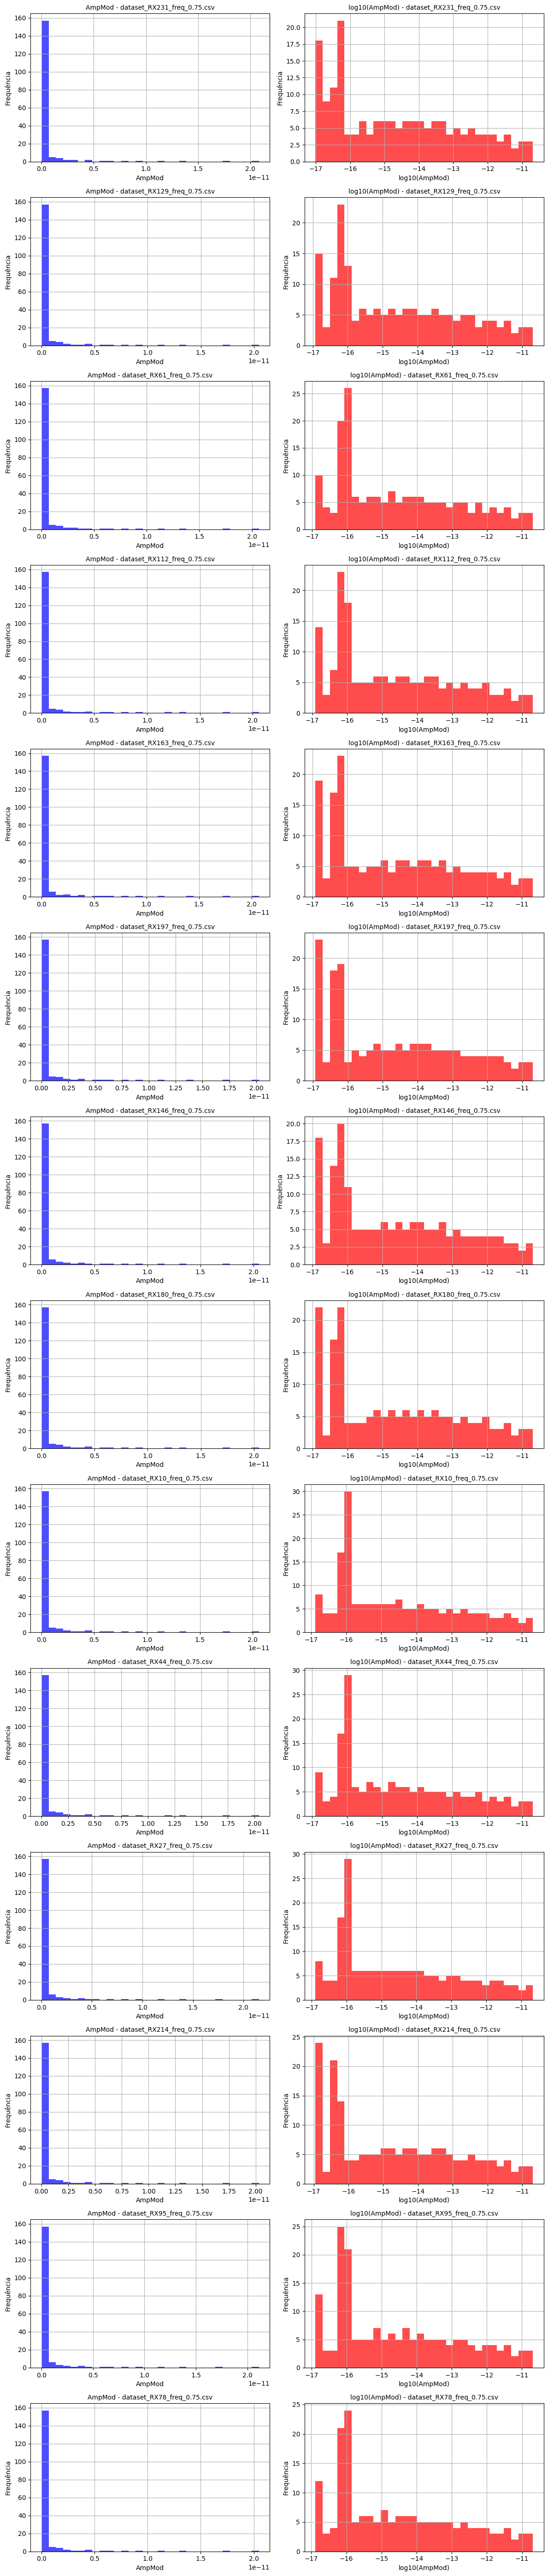

In [ ]:
# CÓDIGO 2.2
# Objetivo: Gerar histogramas para a coluna AmpMod e sua transformação logarítmica (log10(AmpMod)).
# O modelo Jubarte_Line20 possui 14 Receivers.
# Ao usar a técnica HAT - Histogram Augmentation Technique , vou utilizar o histograma de (log10(AmpMod).

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Caminho da pasta contendo os datasets
pasta = '/content/dataset_separado1_Jubarte_JUB20_2002H_23.3V_31'

# Listar todos os arquivos na pasta que terminam com '.csv'
arquivos_csv = [f for f in os.listdir(pasta) if f.endswith('.csv')]

# Número de arquivos para organizar o layout do gráfico
num_arquivos = len(arquivos_csv)

# Definir o layout para o gráfico (2 gráficos por dataset: AmpMod e log10_AmpMod)
num_cols = 2  # Número de colunas para cada dataset (AmpMod e log10_AmpMod)
num_rows = num_arquivos  # Uma linha por dataset

# Histogramas de AmpMod e log10_AmpMod lado a lado
plt.figure(figsize=(12, num_rows * 4))

for i, arquivo in enumerate(arquivos_csv):
    # Caminho completo do arquivo
    caminho_arquivo = os.path.join(pasta, arquivo)

    # Ler o dataset
    data = pd.read_csv(caminho_arquivo)

    # Verifica se a coluna AmpMod está presente
    if 'AmpMod' in data.columns:
        # Histograma de AmpMod
        plt.subplot(num_rows, num_cols, 2 * i + 1)  # Subplot para AmpMod
        plt.hist(data['AmpMod'].dropna(), bins=30, color='blue', alpha=0.7)
        plt.title(f'AmpMod - {arquivo}', fontsize=10)
        plt.xlabel('AmpMod')
        plt.ylabel('Frequência')
        plt.grid(True)

        # Histograma de log10_AmpMod (evita problemas com valores <= 0)
        ampmod_log10 = np.log10(data['AmpMod'].replace(0, np.nan)).dropna()
        plt.subplot(num_rows, num_cols, 2 * i + 2)  # Subplot para log10_AmpMod
        plt.hist(ampmod_log10, bins=30, color='red', alpha=0.7)
        plt.title(f'log10(AmpMod) - {arquivo}', fontsize=10)
        plt.xlabel('log10(AmpMod)')
        plt.ylabel('Frequência')
        plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# CÓDIGO 4.0 - COMPARAÇÃO DE AMPMOD - MODELO JUBARTE LINE20
# Objetivo: arregar conjuntos de dados, extrair a coluna 'AmpMod' de cada um desses datasets,
# e, em seguida, combinar essas colunas em um único DataFrame.
# O resultado é uma tabela que apresenta os valores de 'AmpMod' de todos os datasets,
# permitindo uma comparação direta dos dados em uma visualização consolidada.

import pandas as pd

# Carregar os datasets
dataset1 = pd.read_csv('/content/Jubarte_JUB20_2002H_0.8V_1.csv')
dataset2 = pd.read_csv('/content/Jubarte_JUB20_2002H_4.5V_6.csv')
dataset3 = pd.read_csv('/content/Jubarte_JUB20_2002H_8.3V_11.csv')
dataset4 = pd.read_csv('/content/Jubarte_JUB20_2002H_12.0V_16.csv')
dataset5 = pd.read_csv('/content/Jubarte_JUB20_2002H_15.8V_21.csv')
dataset6 = pd.read_csv('/content/Jubarte_JUB20_2002H_19.5V_26.csv')
dataset7 = pd.read_csv('/content/Jubarte_JUB20_2002H_23.3V_31.csv')
dataset8 = pd.read_csv('/content/Jubarte_JUB20_2002H_27.1V_36.csv')

# Escolher duas colunas de cada dataset
colunas_dataset1 = ['AmpMod', 'AmpObs']
colunas_dataset2 = ['AmpMod', 'AmpObs']
colunas_dataset3 = ['AmpMod']
colunas_dataset4 = ['AmpMod']
colunas_dataset5 = ['AmpMod']
colunas_dataset6 = ['AmpMod']
colunas_dataset7 = ['AmpMod']
colunas_dataset8 = ['AmpMod']


# Criar um novo DataFrame com as colunas escolhidas
novo_dataframe = pd.concat([dataset1[colunas_dataset1], dataset2[colunas_dataset2], dataset3[colunas_dataset3],dataset4[colunas_dataset4],dataset5[colunas_dataset5], dataset6[colunas_dataset6],dataset7[colunas_dataset7],dataset8[colunas_dataset8]], axis=1)

# Imprimir as quatro colunas lado a lado
print(novo_dataframe)

            AmpMod        AmpObs        AmpMod        AmpObs        AmpMod  \
0     6.472900e-17  6.470300e-17  6.467520e-17  6.470300e-17  6.467460e-17   
1     6.547720e-17  6.545200e-17  6.542260e-17  6.545200e-17  6.542210e-17   
2     7.066780e-17  7.064100e-17  7.060890e-17  7.064100e-17  7.060850e-17   
3     7.041120e-17  7.038700e-17  7.035030e-17  7.038700e-17  7.035030e-17   
4     6.984080e-17  6.981900e-17  6.977830e-17  6.981900e-17  6.977880e-17   
...            ...           ...           ...           ...           ...   
2515  1.212840e-17  1.259900e-17  1.261680e-17  1.259900e-17  1.271320e-17   
2516  1.159890e-17  1.212200e-17  1.206490e-17  1.212200e-17  1.216010e-17   
2517  1.132370e-17  1.189200e-17  1.177650e-17  1.189200e-17  1.187130e-17   
2518  1.083160e-17  1.142000e-17  1.126140e-17  1.142000e-17  1.135300e-17   
2519  9.258330e-18  9.785700e-18  9.621520e-18  9.785700e-18  9.699470e-18   

            AmpMod        AmpMod        AmpMod        AmpMod   

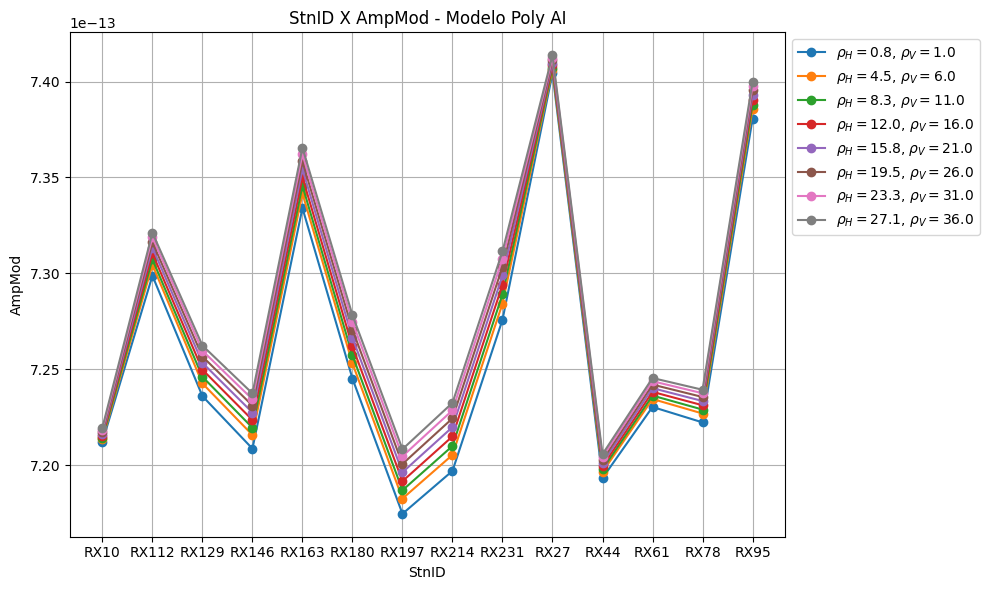

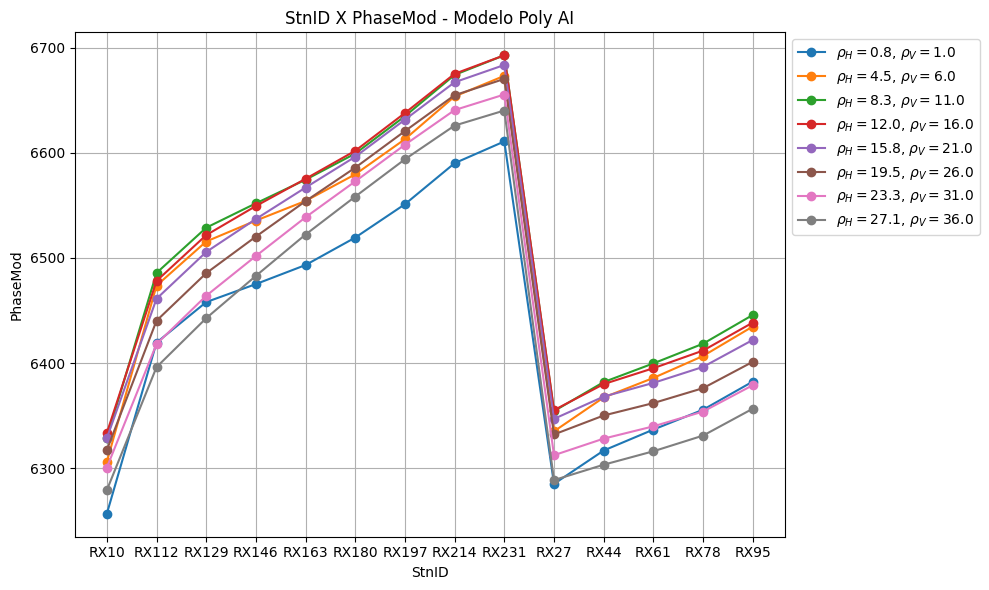

In [ ]:
# CÓDIGO 5.0 - COMPARAÇÃO DE MÉDIAS POR RX - VÁRIAS SIMULAÇÕES - MODELO POLYAI
# Objetivo: Comparar as médias dos valores das variáveis (AmpMod, PhaseMod)
# para diferentes simulações de dados (Rx ou estações StnID) e visualizá-las em gráficos para análise.
# Os dados são extraídos de múltiplos arquivos CSV, que representam diferentes simulações do modelo PolyAI,
# cada um com resistividades horizontais e verticais diferentes.
# Cada ponto no gráfico representa a média de um valor específico (como AmpMod ou PhaseMod) para uma estação (StnID)
# em uma simulação específica.
# Eixo X (StnID): Cada posição no eixo X representa uma estação (ou receptor) identificada por um código único (StnID).
# Eixo Y (Valor de AmpMod ou PhaseMod): O valor de cada ponto no eixo Y representa a média de AmpMod ou PhaseMod
# para aquela estação, calculada com base nos dados filtrados para uma frequência específica e uma simulação (arquivo CSV).

import pandas as pd
import matplotlib.pyplot as plt
import re

# Lista dos arquivos a serem comparados
arquivos = [
    '/content/Jubarte_JUB20_2002H_0.8V_1.csv',
    '/content/Jubarte_JUB20_2002H_4.5V_6.csv',
    '/content/Jubarte_JUB20_2002H_8.3V_11.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_12.0V_16.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_15.8V_21.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_19.5V_26.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_23.3V_31.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_27.1V_36.csv', # CA = 1.33
]

# Dicionário para armazenar as médias por StnID para cada arquivo
medias_por_arquivo = {}

# Função para extrair as resistividades horizontal (H) e vertical (V) do nome do arquivo
def extrair_resistividades(nome_arquivo):
    # Usando regex para capturar valores de resistividade vertical (V) e horizontal (H)
    match = re.search(r'(\d+\.\d+)V_(\d+)', nome_arquivo)
    if match:
        rho_V = float(match.group(1))  # Resistividade vertical
        rho_H = float(match.group(2))  # Resistividade horizontal
        return rho_H, rho_V
    return None, None

# Iterar sobre cada arquivo
for arquivo in arquivos:
    # Carregar o arquivo CSV em um DataFrame
    dados = pd.read_csv(arquivo, header=0)

    # Remover espaços extras nos nomes das colunas, se houver
    dados.columns = dados.columns.str.strip()

    # Calcular a média para cada 'StnID' para as colunas 'AmpMod', 'PhaseMod', 'Freq' e 'Offset'
    medias_por_stn_id = dados.groupby('StnID')[['AmpMod', 'PhaseMod', 'Freq', 'Offset']].mean()

    # Armazenar o resultado no dicionário
    medias_por_arquivo[arquivo] = medias_por_stn_id

# Função auxiliar para colocar a legenda fora do gráfico com as resistividades
def plot_with_legend_outside(title, xlabel, ylabel, column):
    plt.figure(figsize=(10, 6))
    for arquivo, medias in medias_por_arquivo.items():
        rho_H, rho_V = extrair_resistividades(arquivo)  # Extrair resistividades do nome do arquivo
        if rho_H is not None and rho_V is not None:
            # Ajustar a legenda para mostrar somente a letra grega \rho e os valores de resistividade
            label = f'$\\rho_{{H}} = {rho_V}$, $\\rho_{{V}} = {rho_H}$'
        else:
            label = arquivo  # Caso não consiga extrair resistividade, usa o nome do arquivo
        plt.plot(medias.index, medias[column], marker='o', linestyle='-', label=label)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legenda fora do gráfico
    plt.tight_layout()  # Ajusta layout para evitar corte
    plt.show()

# Gráfico 1: Comparação StnID X AmpMod
plot_with_legend_outside('StnID X AmpMod - Modelo Poly AI', 'StnID', 'AmpMod', 'AmpMod')

# Gráfico 2: Comparação StnID X PhaseMod
plot_with_legend_outside('StnID X PhaseMod - Modelo Poly AI', 'StnID', 'PhaseMod', 'PhaseMod')


In [ ]:
# CÓDIGO 6.0
# Objetivo: Comparar e visualizar a relação entre resistividade vertical (rho_V) e o
# valor da (AmpMod) para uma linha específica de dados (linha_desejada) em várias simulações do modelo Jubarte LIne20).
# Cada ponto no gráfico representa:
# Eixo X (Resistividade Vertical, rho_V): A resistividade vertical (em Ohm-m), extraída do nome do arquivo  para cada simulação.
# Eixo Y (AmpMod): O valor de  (AmpMod) para a linha específica (linha_desejada) em cada simulação.
# Interpolação com Spline Cúbica:
# A spline gera uma curva suave (em vermelho no gráfico) que representa a tendência dos dados entre os pontos,
#  permitindo uma análise mais detalhada de como a amplitude observada varia com a resistividade.

import pandas as pd
import plotly.graph_objects as go
import re
import numpy as np
from scipy.interpolate import make_interp_spline

# Lista dos arquivos a serem comparados
arquivos = [
    '/content/Jubarte_JUB20_2002H_0.8V_1.csv',
    '/content/Jubarte_JUB20_2002H_4.5V_6.csv',
    '/content/Jubarte_JUB20_2002H_8.3V_11.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_12.0V_16.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_15.8V_21.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_19.5V_26.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_23.3V_31.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_27.1V_36.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_30.8V_41.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_34.6V_46.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_37.6V_50.0.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_38.3V_51.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_45.9V_61.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_49.6V_66.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_57.1V_76.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_64.7V_86.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_68.4V_91.csv', # CA = 1.33
]

# Função para extrair as resistividades horizontal (H) e vertical (V) do nome do arquivo
def extrair_resistividades(nome_arquivo):
    # Usando regex para capturar valores de resistividade vertical (V) e horizontal (H)
    match = re.search(r'(\d+\.\d+)V_(\d+)', nome_arquivo)
    if match:
        rho_V = float(match.group(1))  # Resistividade vertical
        rho_H = float(match.group(2))  # Resistividade horizontal
        return rho_H, rho_V
    return None, None

# Listas para armazenar os valores de resistividade e os valores de AmpMod
resistividades = []
ampmod_linhas = []

# Especificar a linha desejada para plotar
linha_desejada = 300  # Altere este valor para escolher a linha desejada

# Iterar sobre cada arquivo
for arquivo in arquivos:
    # Carregar o arquivo CSV em um DataFrame
    dados = pd.read_csv(arquivo, header=0)

    # Remover espaços extras nos nomes das colunas, se houver
    dados.columns = dados.columns.str.strip()

    # Verificar se a coluna 'AmpMod' está presente no dataset
    if 'AmpMod' in dados.columns:
        # Obter o valor da linha especificada da coluna 'AmpMod'
        if linha_desejada < len(dados):
            valor_ampmod = dados['AmpMod'].iloc[linha_desejada]
        else:
            print(f"Erro: A linha {linha_desejada} não existe no arquivo {arquivo}.")
            continue

        # Extrair as resistividades horizontal e vertical do nome do arquivo
        rho_H, rho_V = extrair_resistividades(arquivo)

        if rho_H is not None and rho_V is not None:
            # Armazenar a resistividade e o valor de AmpMod
            resistividades.append(rho_H)  # Usando resistividade horizontal como x
            ampmod_linhas.append(valor_ampmod)

            # Imprimir o par ordenado (resistividade, AmpMod)
            print(f'(Resistividade: {rho_H}, AmpMod: {valor_ampmod})')

# Converter listas para arrays numpy
resistividades = np.array(resistividades)
ampmod_linhas = np.array(ampmod_linhas)

# Ordenar os dados para a interpolação
sorted_indices = np.argsort(resistividades)
resistividades_sorted = resistividades[sorted_indices]
ampmod_sorted = ampmod_linhas[sorted_indices]

# Criar uma spline cúbica
spline = make_interp_spline(resistividades_sorted, ampmod_sorted)
resistividades_spline = np.linspace(resistividades_sorted.min(), resistividades_sorted.max(), 500)
ampmod_spline = spline(resistividades_spline)

# Criar o gráfico interativo usando Plotly
fig = go.Figure()

# Adicionar pontos ao gráfico com a linha especificada destacada
fig.add_trace(go.Scatter(
    x=resistividades_sorted,
    y=ampmod_sorted,
    mode='markers',
    name=f'AmpMod (Linha {linha_desejada})',
    marker=dict(size=10, color='blue'),
))

# Adicionar a spline cúbica ao gráfico
fig.add_trace(go.Scatter(
    x=resistividades_spline,
    y=ampmod_spline,
    mode='lines',
    name='Spline Cúbica',
    line=dict(color='red', width=2)
))

# Configurar o layout do gráfico
fig.update_layout(
    title=f'Resistividade Vertical vs AmpMod (Linha {linha_desejada})',
    xaxis_title='Resistividade Vertical (Ohm-m)',
    yaxis_title=f'AmpMod (Linha {linha_desejada})',
    template='plotly_white',
    hovermode='closest'
)

# Exibir o gráfico interativo
fig.show()


(Resistividade: 1.0, AmpMod: 9.01557e-15)
(Resistividade: 6.0, AmpMod: 9.92341e-15)
(Resistividade: 11.0, AmpMod: 1.11953e-14)
(Resistividade: 16.0, AmpMod: 1.24146e-14)
(Resistividade: 21.0, AmpMod: 1.35057e-14)
(Resistividade: 26.0, AmpMod: 1.44677e-14)
(Resistividade: 31.0, AmpMod: 1.53164e-14)
(Resistividade: 36.0, AmpMod: 1.60688e-14)
(Resistividade: 41.0, AmpMod: 1.67398e-14)
(Resistividade: 46.0, AmpMod: 1.7342e-14)
(Resistividade: 50.0, AmpMod: 1.77806e-14)
(Resistividade: 51.0, AmpMod: 1.78855e-14)
(Resistividade: 61.0, AmpMod: 1.8828e-14)
(Resistividade: 66.0, AmpMod: 1.92393e-14)
(Resistividade: 76.0, AmpMod: 1.99653e-14)
(Resistividade: 86.0, AmpMod: 2.05857e-14)
(Resistividade: 91.0, AmpMod: 2.08631e-14)


In [ ]:
# Objetivo: Comparar e visualizar a relação entre resistividade vertical (rho_V) e o
# valor da (AmpMod) para uma linha específica de dados (linha_desejada) em várias simulações do modelo Jubarte LIne20).
# Cada ponto no gráfico representa:
# Eixo X (Resistividade Vertical, rho_V): A resistividade vertical (em Ohm-m), extraída do nome do arquivo  para cada simulação.
# Eixo Y (AmpMod): O valor de  (AmpMod) para a linha específica (linha_desejada) em cada simulação.
# Interpolação com Spline Cúbica:
# A spline gera uma curva suave (em vermelho no gráfico) que representa a tendência dos dados entre os pontos,
#  permitindo uma análise mais detalhada de como a amplitude observada varia com a resistividade.

import pandas as pd
import plotly.graph_objects as go
import re
import numpy as np
from scipy.interpolate import make_interp_spline

# Lista dos arquivos a serem comparados
arquivos = [
    '/content/Jubarte_JUB20_2002H_0.8V_1.csv',
    '/content/Jubarte_JUB20_2002H_4.5V_6.csv',
    '/content/Jubarte_JUB20_2002H_8.3V_11.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_12.0V_16.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_15.8V_21.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_19.5V_26.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_23.3V_31.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_27.1V_36.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_30.8V_41.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_34.6V_46.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_37.6V_50.0.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_38.3V_51.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_45.9V_61.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_49.6V_66.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_57.1V_76.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_64.7V_86.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_68.4V_91.csv', # CA = 1.33
]

# Função para extrair as resistividades horizontal (H) e vertical (V) do nome do arquivo
def extrair_resistividades(nome_arquivo):
    # Usando regex para capturar valores de resistividade vertical (V) e horizontal (H)
    match = re.search(r'(\d+\.\d+)V_(\d+)', nome_arquivo)
    if match:
        rho_V = float(match.group(1))  # Resistividade vertical
        rho_H = float(match.group(2))  # Resistividade horizontal
        return rho_H, rho_V
    return None, None

# Listas para armazenar os valores de resistividade e os valores de AmpMod
resistividades = []
ampmod_linhas = []

# Especificar a linha desejada para plotar
linha_desejada = 300  # Altere este valor para escolher a linha desejada

# Iterar sobre cada arquivo
for arquivo in arquivos:
    # Carregar o arquivo CSV em um DataFrame
    dados = pd.read_csv(arquivo, header=0)

    # Remover espaços extras nos nomes das colunas, se houver
    dados.columns = dados.columns.str.strip()

    # Verificar se a coluna 'AmpMod' está presente no dataset
    if 'AmpMod' in dados.columns:
        # Obter o valor da linha especificada da coluna 'AmpMod'
        if linha_desejada < len(dados):
            valor_ampmod = dados['AmpMod'].iloc[linha_desejada]
        else:
            print(f"Erro: A linha {linha_desejada} não existe no arquivo {arquivo}.")
            continue

        # Extrair as resistividades horizontal e vertical do nome do arquivo
        rho_H, rho_V = extrair_resistividades(arquivo)

        if rho_H is not None and rho_V is not None:
            # Armazenar a resistividade e o valor de AmpMod
            resistividades.append(rho_H)  # Usando resistividade horizontal como x
            ampmod_linhas.append(valor_ampmod)

            # Imprimir o par ordenado (resistividade, AmpMod)
            print(f'(Resistividade: {rho_H}, AmpMod: {valor_ampmod})')

# Converter listas para arrays numpy
resistividades = np.array(resistividades)
ampmod_linhas = np.array(ampmod_linhas)

# Ordenar os dados para a interpolação
sorted_indices = np.argsort(resistividades)
resistividades_sorted = resistividades[sorted_indices]
ampmod_sorted = ampmod_linhas[sorted_indices]

# Criar uma spline cúbica
spline = make_interp_spline(resistividades_sorted, ampmod_sorted)
resistividades_spline = np.linspace(resistividades_sorted.min(), resistividades_sorted.max(), 500)
ampmod_spline = spline(resistividades_spline)

# Criar o gráfico interativo usando Plotly
fig = go.Figure()

# Adicionar pontos ao gráfico com cores variadas para diferentes resistividades
fig.add_trace(go.Scatter(
    x=resistividades_sorted,
    y=ampmod_sorted,
    mode='markers',
   # name=f'AmpMod (Linha {linha_desejada})',
    marker=dict(
        size=10,
        color=resistividades_sorted,  # Define a cor com base na resistividade
        colorscale='rainbow',         # Escolhe uma escala de cores (pode ser 'Viridis', 'Cividis', etc.)
        colorbar=dict(title='Res. Vert. (Ohm-m)')  # Legenda de cores
    ),
))

# Adicionar a spline cúbica ao gráfico
fig.add_trace(go.Scatter(
    x=resistividades_spline,
    y=ampmod_spline,
    mode='lines',
    name='Spline Cúbica',
    line=dict(color='red', width=2)
))

# Configurar o layout do gráfico
fig.update_layout(
    title=f'Res. Vert. vs AmpMod',
    xaxis_title='Res. Vert. (Ohm-m)',
    yaxis_title=f'AmpMod (Linha {linha_desejada})',
    template='plotly_white',
    hovermode='closest'
)

# Exibir o gráfico interativo
fig.show()


(Resistividade: 1.0, AmpMod: 9.01557e-15)
(Resistividade: 6.0, AmpMod: 9.92341e-15)
(Resistividade: 11.0, AmpMod: 1.11953e-14)
(Resistividade: 16.0, AmpMod: 1.24146e-14)
(Resistividade: 21.0, AmpMod: 1.35057e-14)
(Resistividade: 26.0, AmpMod: 1.44677e-14)
(Resistividade: 31.0, AmpMod: 1.53164e-14)
(Resistividade: 36.0, AmpMod: 1.60688e-14)
(Resistividade: 41.0, AmpMod: 1.67398e-14)
(Resistividade: 46.0, AmpMod: 1.7342e-14)
(Resistividade: 50.0, AmpMod: 1.77806e-14)
(Resistividade: 51.0, AmpMod: 1.78855e-14)
(Resistividade: 61.0, AmpMod: 1.8828e-14)
(Resistividade: 66.0, AmpMod: 1.92393e-14)
(Resistividade: 76.0, AmpMod: 1.99653e-14)
(Resistividade: 86.0, AmpMod: 2.05857e-14)
(Resistividade: 91.0, AmpMod: 2.08631e-14)


In [ ]:
# CÓDIGO 7.0 - A ideia aqui é poder comparar vários receivers das simulações.
# Cada spiline do grafico representa um receiver diferente.

import pandas as pd
import plotly.graph_objects as go
import re
import numpy as np
from scipy.interpolate import make_interp_spline

# Lista dos arquivos a serem comparados
arquivos = [
    '/content/Jubarte_JUB20_2002H_0.8V_1.csv',
    '/content/Jubarte_JUB20_2002H_4.5V_6.csv',
    '/content/Jubarte_JUB20_2002H_8.3V_11.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_12.0V_16.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_15.8V_21.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_19.5V_26.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_23.3V_31.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_27.1V_36.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_30.8V_41.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_34.6V_46.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_37.6V_50.0.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_38.3V_51.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_45.9V_61.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_49.6V_66.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_57.1V_76.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_64.7V_86.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_68.4V_91.csv', # CA = 1.33
]

# Função para extrair resistividades horizontal (H) e vertical (V) do nome do arquivo
def extrair_resistividades(nome_arquivo):
    match = re.search(r'(\d+\.\d+)V_(\d+)', nome_arquivo)
    if match:
        rho_V = float(match.group(1))
        rho_H = float(match.group(2))
        return rho_H, rho_V
    return None, None

# Lista de linhas desejadas para plotar
linhas_desejadas = [ 120, 300, 480, 660, 840]  # Altere conforme necessário 120, 300, 480, 660, 840,

# Criar o gráfico interativo com Plotly
fig = go.Figure()

# Iterar sobre cada linha desejada
for linha in linhas_desejadas:
    resistividades = []
    ampmod_linhas = []

    # Iterar sobre cada arquivo
    for arquivo in arquivos:
        dados = pd.read_csv(arquivo, header=0)
        dados.columns = dados.columns.str.strip()

        # Verificar se a coluna 'AmpMod' está presente
        if 'AmpMod' in dados.columns:
            if linha < len(dados):
                valor_ampmod = dados['AmpMod'].iloc[linha]
            else:
                print(f"Erro: A linha {linha} não existe no arquivo {arquivo}.")
                continue

            # Extrair resistividades
            rho_H, rho_V = extrair_resistividades(arquivo)
            if rho_H is not None and rho_V is not None:
                resistividades.append(rho_H)
                ampmod_linhas.append(valor_ampmod)

    # Converter e ordenar os dados
    resistividades = np.array(resistividades)
    ampmod_linhas = np.array(ampmod_linhas)
    sorted_indices = np.argsort(resistividades)
    resistividades_sorted = resistividades[sorted_indices]
    ampmod_sorted = ampmod_linhas[sorted_indices]

    # Criar spline cúbica para suavização
    spline = make_interp_spline(resistividades_sorted, ampmod_sorted)
    resistividades_spline = np.linspace(resistividades_sorted.min(), resistividades_sorted.max(), 500)
    ampmod_spline = spline(resistividades_spline)

    # Adicionar linha e spline ao gráfico
    fig.add_trace(go.Scatter(
        x=resistividades_sorted,
        y=ampmod_sorted,
        mode='markers',
        name=f'AmpMod (Linha {linha})',
        marker=dict(size=8),
    ))

    fig.add_trace(go.Scatter(
        x=resistividades_spline,
        y=ampmod_spline,
        mode='lines',
        name=f'Spline Cúbica (Linha {linha})',
        line=dict(width=2)
    ))

# Configurar o layout do gráfico
fig.update_layout(
    title='Comparação de AmpMod entre Linhas',
    xaxis_title='Resistividade Vertical (Ohm-m)',
    yaxis_title='AmpMod',
    template='plotly_white',
    hovermode='closest'
)

# Exibir o gráfico interativo
fig.show()


In [ ]:
# CÓDIGO 8.0 - COMPARAÇÃO DE PHASEMOD - MODELO JUBARTE LINE20
# Resumo do Código: Este código tem como objetivo principal carregar conjuntos de dados ,
# extrair a coluna 'PhaseMod' de cada um desses datasets, e, em seguida, combinar essas colunas em um único DataFrame.
# O resultado é uma tabela que apresenta os valores de 'PhaseMod' de todos os datasets,
# permitindo uma comparação direta dos dados em uma visualização consolidada.

import pandas as pd

# Carregar os datasets
dataset1 = pd.read_csv('/content/Jubarte_JUB20_2002H_0.8V_1.csv')
dataset2 = pd.read_csv('/content/Jubarte_JUB20_2002H_4.5V_6.csv')
dataset3 = pd.read_csv('/content/Jubarte_JUB20_2002H_8.3V_11.csv')
dataset4 = pd.read_csv('/content/Jubarte_JUB20_2002H_12.0V_16.csv')
dataset5 = pd.read_csv('/content/Jubarte_JUB20_2002H_15.8V_21.csv')
dataset6 = pd.read_csv('/content/Jubarte_JUB20_2002H_19.5V_26.csv')

# Escolher duas colunas de cada dataset
colunas_dataset1 = ['PhaseMod', 'PhaseObs']
colunas_dataset2 = ['PhaseMod', 'PhaseObs']
colunas_dataset3 = ['PhaseMod']
colunas_dataset4 = ['PhaseMod']
colunas_dataset5 = ['PhaseMod']
colunas_dataset6 = ['PhaseMod']

# Criar um novo DataFrame com as colunas escolhidas
novo_dataframe = pd.concat([dataset1[colunas_dataset1], dataset2[colunas_dataset2], dataset3[colunas_dataset3],dataset4[colunas_dataset4],dataset5[colunas_dataset5], dataset6[colunas_dataset6]], axis=1)

# Imprimir as quatro colunas lado a lado
print(novo_dataframe)

      PhaseMod  PhaseObs  PhaseMod  PhaseObs  PhaseMod  PhaseMod  PhaseMod  \
0       6952.9    6953.8    6952.8    6953.8    6952.9    6953.1    6953.2   
1       6956.0    6957.0    6955.9    6957.0    6956.1    6956.2    6956.4   
2       6959.2    6960.1    6959.1    6960.1    6959.2    6959.4    6959.5   
3       6977.7    6978.7    6977.6    6978.7    6977.8    6977.9    6978.1   
4       6994.3    6995.4    6994.3    6995.4    6994.5    6994.6    6994.7   
...        ...       ...       ...       ...       ...       ...       ...   
2515    8945.6    8983.4    9000.3    8983.4    9003.2    9001.6    8998.9   
2516    8947.3    8990.1    9003.4    8990.1    9007.2    9006.3    9004.2   
2517    8948.2    8995.8    9005.7    8995.8    9010.2    9010.0    9008.5   
2518    8948.4    9000.7    9007.2    9000.7    9012.4    9012.8    9011.8   
2519    8947.6    9004.5    9007.6    9004.5    9013.3    9014.3    9013.8   

      PhaseMod  
0       6953.3  
1       6956.5  
2       6959

In [ ]:
# CÓDIGO 9.0

import pandas as pd
import plotly.graph_objects as go
import re
import numpy as np
from scipy.interpolate import make_interp_spline

# Lista dos arquivos a serem comparados
arquivos = [
    '/content/Jubarte_JUB20_2002H_0.8V_1.csv',
    '/content/Jubarte_JUB20_2002H_4.5V_6.csv',
    '/content/Jubarte_JUB20_2002H_8.3V_11.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_12.0V_16.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_15.8V_21.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_19.5V_26.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_23.3V_31.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_27.1V_36.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_30.8V_41.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_34.6V_46.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_37.6V_50.0.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_38.3V_51.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_45.9V_61.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_49.6V_66.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_57.1V_76.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_64.7V_86.csv', # CA = 1.33
    '/content/Jubarte_JUB20_2002H_68.4V_91.csv', # CA = 1.33
]

# Função para extrair as resistividades horizontal (H) e vertical (V) do nome do arquivo
def extrair_resistividades(nome_arquivo):
    # Usando regex para capturar valores de resistividade vertical (V) e horizontal (H)
    match = re.search(r'(\d+\.\d+)V_(\d+)', nome_arquivo)
    if match:
        rho_V = float(match.group(1))  # Resistividade vertical
        rho_H = float(match.group(2))  # Resistividade horizontal
        return rho_H, rho_V
    return None, None

# Listas para armazenar os valores de resistividade e os valores de PhaseMod
resistividades = []
phasemod_linhas = []

# Especificar a linha desejada para plotar (exemplo: linha 0 para a primeira linha)
linha_desejada = 120  # Altere este valor para escolher a linha desejada (0 para primeira, 1 para segunda, etc.)

# Iterar sobre cada arquivo
for arquivo in arquivos:
    # Carregar o arquivo CSV em um DataFrame
    dados = pd.read_csv(arquivo, header=0)

    # Remover espaços extras nos nomes das colunas, se houver
    dados.columns = dados.columns.str.strip()

    # Verificar se a coluna 'PhaseMod' está presente no dataset
    if 'PhaseMod' in dados.columns:
        # Obter o valor da linha especificada da coluna 'PhaseMod'
        if linha_desejada < len(dados):
            valor_phasemod = dados['PhaseMod'].iloc[linha_desejada]
        else:
            print(f"Erro: A linha {linha_desejada} não existe no arquivo {arquivo}.")
            continue

        # Extrair as resistividades horizontal e vertical do nome do arquivo
        rho_H, rho_V = extrair_resistividades(arquivo)

        if rho_H is not None and rho_V is not None:
            # Armazenar a resistividade e o valor de PhaseMod
            resistividades.append(rho_H)  # Usando resistividade horizontal como x
            phasemod_linhas.append(valor_phasemod)

            # Imprimir o par ordenado (resistividade, PhaseMod)
            print(f'(Resistividade: {rho_H}, PhaseMod: {valor_phasemod})')

# Converter listas para arrays numpy
resistividades = np.array(resistividades)
phasemod_linhas = np.array(phasemod_linhas)

# Ordenar os dados para a interpolação
sorted_indices = np.argsort(resistividades)
resistividades_sorted = resistividades[sorted_indices]
phasemod_sorted = phasemod_linhas[sorted_indices]

# Criar uma spline cúbica
spline = make_interp_spline(resistividades_sorted, phasemod_sorted)
resistividades_spline = np.linspace(resistividades_sorted.min(), resistividades_sorted.max(), 500)
phasemod_spline = spline(resistividades_spline)

# Criar o gráfico interativo usando Plotly
fig = go.Figure()

# Adicionar pontos ao gráfico
fig.add_trace(go.Scatter(
    x=resistividades_sorted,
    y=phasemod_sorted,
    mode='markers',
    name=f'PhaseMod (Linha {linha_desejada + 1})',
    marker=dict(size=10, color='blue'),
))

# Adicionar a spline cúbica ao gráfico
fig.add_trace(go.Scatter(
    x=resistividades_spline,
    y=phasemod_spline,
    mode='lines',
    name='Spline Cúbica',
    line=dict(color='red', width=2)
))

# Configurar o layout do gráfico
fig.update_layout(
    title='Res. Vert. vs PhaseMod (Linha_desejada)',
    xaxis_title='Resistividade Vertical (Ohm-m)',
    yaxis_title='PhaseMod (Linha_desejada)',
    template='plotly_white',
    hovermode='closest'
)

# Exibir o gráfico interativo
fig.show()


(Resistividade: 1.0, PhaseMod: 6195.1)
(Resistividade: 6.0, PhaseMod: 6277.7)
(Resistividade: 11.0, PhaseMod: 6315.3)
(Resistividade: 16.0, PhaseMod: 6322.3)
(Resistividade: 21.0, PhaseMod: 6314.5)
(Resistividade: 26.0, PhaseMod: 6300.0)
(Resistividade: 31.0, PhaseMod: 6282.5)
(Resistividade: 36.0, PhaseMod: 6264.1)
(Resistividade: 41.0, PhaseMod: 6245.8)
(Resistividade: 46.0, PhaseMod: 6227.9)
(Resistividade: 50.0, PhaseMod: 6214.1)
(Resistividade: 51.0, PhaseMod: 6210.7)
(Resistividade: 61.0, PhaseMod: 6178.8)
(Resistividade: 66.0, PhaseMod: 6164.1)
(Resistividade: 76.0, PhaseMod: 6137.0)
(Resistividade: 86.0, PhaseMod: 6112.7)
(Resistividade: 91.0, PhaseMod: 6101.5)


In [ ]:
# CÓDIGO 10.0

import pandas as pd
import plotly.graph_objects as go
import re
import numpy as np
from scipy.interpolate import make_interp_spline

# Lista dos arquivos a serem comparados , CA = 1.33
arquivos = [
    '/content/Jubarte_JUB20_2002H_0.8V_1.csv',
    '/content/Jubarte_JUB20_2002H_4.5V_6.csv',
    '/content/Jubarte_JUB20_2002H_8.3V_11.csv',
    '/content/Jubarte_JUB20_2002H_12.0V_16.csv',
    '/content/Jubarte_JUB20_2002H_15.8V_21.csv',
    '/content/Jubarte_JUB20_2002H_19.5V_26.csv',
    '/content/Jubarte_JUB20_2002H_23.3V_31.csv',
    '/content/Jubarte_JUB20_2002H_27.1V_36.csv',
    '/content/Jubarte_JUB20_2002H_30.8V_41.csv',
    '/content/Jubarte_JUB20_2002H_34.6V_46.csv',
    '/content/Jubarte_JUB20_2002H_37.6V_50.0.csv',
    '/content/Jubarte_JUB20_2002H_38.3V_51.csv',
    '/content/Jubarte_JUB20_2002H_45.9V_61.csv',
    '/content/Jubarte_JUB20_2002H_49.6V_66.csv',
    '/content/Jubarte_JUB20_2002H_57.1V_76.csv',
    '/content/Jubarte_JUB20_2002H_64.7V_86.csv',
    '/content/Jubarte_JUB20_2002H_68.4V_91.csv',
]

# Função para extrair resistividades horizontal (H) e vertical (V) do nome do arquivo
def extrair_resistividades(nome_arquivo):
    match = re.search(r'(\d+\.\d+)V_(\d+)', nome_arquivo)
    if match:
        rho_V = float(match.group(1))  # Resistividade vertical
        rho_H = float(match.group(2))  # Resistividade horizontal
        return rho_H, rho_V
    return None, None

# Lista de linhas desejadas para plotar
linhas_desejadas = [120, 300, 480, 660, 840, 1020, 1200, 1380]  # Altere conforme necessário

# Criar o gráfico interativo com Plotly
fig = go.Figure()

# Iterar sobre cada linha desejada
for linha in linhas_desejadas:
    resistividades = []
    phasemod_linhas = []

    # Iterar sobre cada arquivo
    for arquivo in arquivos:
        dados = pd.read_csv(arquivo, header=0)
        dados.columns = dados.columns.str.strip()

        # Verificar se a coluna 'PhaseMod' está presente
        if 'PhaseMod' in dados.columns:
            if linha < len(dados):
                valor_phasemod = dados['PhaseMod'].iloc[linha]
            else:
                print(f"Erro: A linha {linha} não existe no arquivo {arquivo}.")
                continue

            # Extrair resistividades
            rho_H, rho_V = extrair_resistividades(arquivo)
            if rho_H is not None and rho_V is not None:
                resistividades.append(rho_H)
                phasemod_linhas.append(valor_phasemod)

    # Converter e ordenar os dados
    resistividades = np.array(resistividades)
    phasemod_linhas = np.array(phasemod_linhas)
    sorted_indices = np.argsort(resistividades)
    resistividades_sorted = resistividades[sorted_indices]
    phasemod_sorted = phasemod_linhas[sorted_indices]

    # Criar spline cúbica para suavização
    spline = make_interp_spline(resistividades_sorted, phasemod_sorted)
    resistividades_spline = np.linspace(resistividades_sorted.min(), resistividades_sorted.max(), 500)
    phasemod_spline = spline(resistividades_spline)

    # Adicionar linha e spline ao gráfico
    fig.add_trace(go.Scatter(
        x=resistividades_sorted,
        y=phasemod_sorted,
        mode='markers',
        name=f'PhaseMod (Linha {linha})',
        marker=dict(size=8),
    ))

    fig.add_trace(go.Scatter(
        x=resistividades_spline,
        y=phasemod_spline,
        mode='lines',
        #name=f'Spline Cúbica (Linha {linha})',
        line=dict(width=2)
    ))

# Configurar o layout do gráfico
fig.update_layout(
    title='Comparação de PhaseMod entre Linhas',
    xaxis_title='Resistividade Vertical (Ohm-m)',
    yaxis_title='PhaseMod',
    template='plotly_white',
    hovermode='closest'
)

# Exibir o gráfico interativo
fig.show()
